In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import kmeans_plusplus, KMeans

# Image preprocessing

In [21]:
img = cv2.cvtColor(cv2.imread("data/kid.jpeg"), cv2.COLOR_BGR2RGB)

# resizing the data
img = cv2.resize(img, (306, 382))
img.shape

(382, 306, 3)

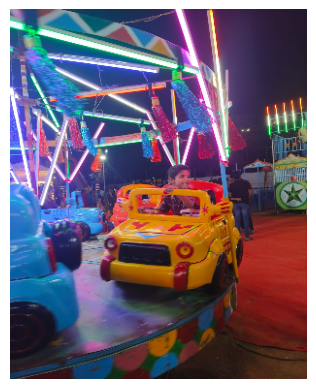

In [22]:
plt.imshow(img)
plt.axis("off")
plt.show()

In [23]:
X = img.reshape((-1, 3))
X.shape

(116892, 3)

In [24]:
X[:,:1]

array([[158],
       [170],
       [177],
       ...,
       [ 83],
       [ 88],
       [ 92]], dtype=uint8)

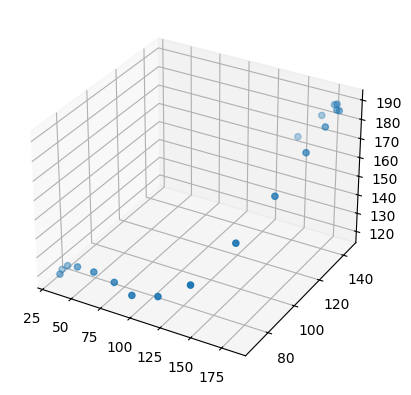

In [25]:
# ploting the first 20 points of X
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:20,0:1], X[:20, 1:2], X[:20, 2:])

# Model

In [45]:
k = 15
model = KMeans(n_clusters=k)
model.fit(X)

KMeans(n_clusters=15)

In [46]:
centroids = model.cluster_centers_
centroids

array([[ 64.83806461, 129.35617396, 211.64284715],
       [ 44.57669255,  45.75922899,  76.545566  ],
       [211.16727993, 128.28247948,  16.82253043],
       [243.16104692, 246.59750059, 245.56873379],
       [ 99.71340249,  35.35544378,  28.05228964],
       [178.70214482, 155.73697791, 202.61377197],
       [ 18.48547268, 101.43907199, 141.93202515],
       [215.00441426, 130.18302207, 114.69847199],
       [146.8970297 ,  64.19031903, 112.99955996],
       [ 72.71608201,  59.85655935, 103.38963639],
       [ 87.25156882,  90.10598243, 147.81662251],
       [134.81623804, 143.56937799, 156.84913278],
       [ 37.47045988,  27.58196498,  33.41236157],
       [160.74075053,  92.32928118,   5.14534884],
       [169.51201508,  39.45657295,  36.4477776 ]])

In [47]:
# converting the centroids to color numpy array
# unit8 is good data type as it lies b/w 0-255
# colors: RGB format colors
colors = np.array(centroids, dtype='uint8')
colors

array([[ 64, 129, 211],
       [ 44,  45,  76],
       [211, 128,  16],
       [243, 246, 245],
       [ 99,  35,  28],
       [178, 155, 202],
       [ 18, 101, 141],
       [215, 130, 114],
       [146,  64, 112],
       [ 72,  59, 103],
       [ 87,  90, 147],
       [134, 143, 156],
       [ 37,  27,  33],
       [160,  92,   5],
       [169,  39,  36]], dtype=uint8)

# Getting the colors

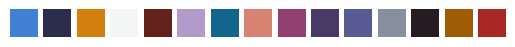

In [48]:
# showing colors by using subplots
i = 1
for color in colors:
    plt.subplot(1,k,i)
    i += 1
    plt.axis("off")
    mat = np.zeros((100,100,3), dtype='uint8')
    mat[:, :, :] = color
    plt.imshow(mat)

plt.show()


# Coloring the image with Dominant Color
* Basic Segmentation based upon similar color
* Segmentation partitions an image into regions
* Having similar visual appearance corresponding to parts of objects

In [49]:
np.unique(model.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int32)

In [50]:
# Creating a new image 
newImg = np.zeros((X.shape), dtype='uint8')
# Right now it is in flatten image
newImg.shape

(116892, 3)

In [51]:
for i in range(newImg.shape[0]):
    # need to paint
    newImg[i] = colors[model.labels_[i]]

In [52]:
newImg = newImg.reshape(img.shape)
newImg.shape

(382, 306, 3)

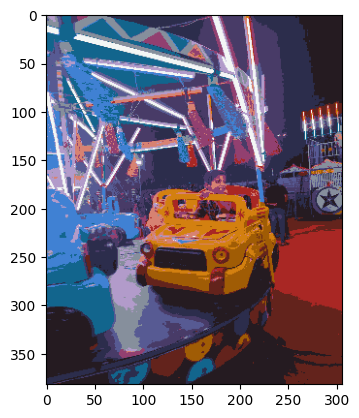

In [53]:
plt.imshow(newImg)
plt.show()